<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/42_albumentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
!pip install rasterio

In [ ]:
import random
import albumentations as A
import matplotlib.pyplot as plt
import pooch
import rasterio as rio
import rasterio.plot as ras_plot

In [ ]:
u22_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/raster/U22.tif',
    known_hash='e31ab10ca0a6f917c3bba2eea5d0e1a8c3ed0fde4e8b9174183019bb9f830c74'
)

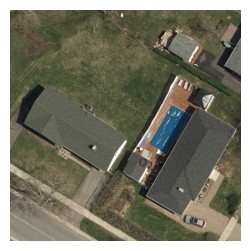

In [ ]:
with rio.open(u22_file) as src:
    data = ras_plot.reshape_as_image(src.read())[3500:4500, 3000:4000, :]
    plt.figure(figsize=(3, 3))
    plt.imshow(data)
    plt.axis('off');

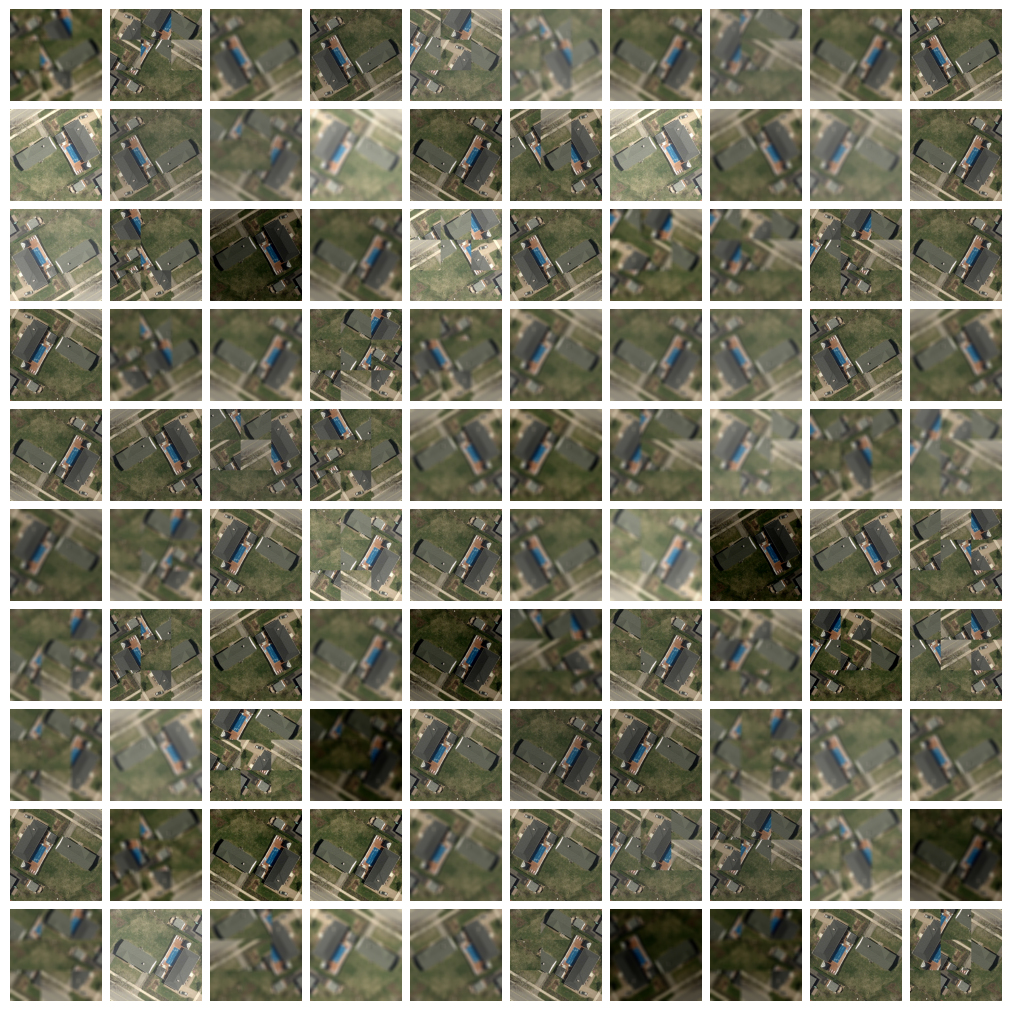

In [ ]:
random.seed(200)

transform = A.Compose([
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.RandomBrightnessContrast(),
    A.RandomGridShuffle(grid=(3, 3)),
    A.Blur(blur_limit=(50, 50)),
])

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10, 10), constrained_layout=True)
for ax in axs.flatten():
    transformed = transform(image=data)['image']
    ax.imshow(transformed)
    ax.set_axis_off()

plt.savefig('transformed.png', dpi=500, bbox_inches='tight')